# Uso del filtro de promedio móvil (*Moving Average Filter*) para el proceso de *denoising* en una señal analógica.

<span style="font-family: 'Verdana'; color: red;"> *Bronquivoide* </span>

### El proceso de *Denoising* tiene su fundamento en recuperar una señal analógica que ha sido alterada por ruido. Uno de los métodos que se utilizan es el *Moving Average Filter*.

# Fundamentos matemáticos:

### Para una señal analógica de entrada $v(t)$, a un tiempo arbitrario $\mathcal{T}$, su valor magnitud es $v(\mathcal{T})$.

### El operador *Moving Average* ($\mathcal{A}_a$) sobre la señal $v(t)$, para un traslado temporal $\pm a$, está definido como la suma de las contribuciones de $v(\mathcal{T})$ a lo largo del tiempo $d\mathcal{T}$ de la siguiente manera:

<font size="5"> $\mathcal{A}_a v(t)=\frac{1}{2a}\int_{t-a} ^{t+a} v(\mathcal{T})d\mathcal{T}$ </font>

### Notemos que el moving average depende del parámetro $a$, y que al considerar las aportaciones de $v$ en un tiempo $t+a$, hablamos de tiempos futuros, por lo cual el sistema es clasificado, por definición, como no causal.

### A un tiempo $t=t_0$, la señal de salida es $w(t_0)=\mathcal{A}_a v(t_0)$.

### Ahora, considerando un sistema causal discreto *LTI*, y considerando que está descrito como *FIR* (los conceptos LTI y FIR fueron abordados en el notebook sobre convolución en señales), definimos el filtro *Moving Average* para una señal analógica de entrada $x(n)$, como una salida $y(n)$ descrita analíticamente como:

<font size="5"> $y(n)=\frac{1}{M+1}\sum _{k=0}^{M} x(n-k)=\frac{1}{M}\sum _{k=0}^{M-1} x(n-k)$ </font>

### Es decir, $\forall n$ (tiempo discretizado), el moving average filter toma $M$ valores para promediarlos. $M$ es el número de muestras de la señal de entrada (conocido como el orden o la ventana del promedio móvil). 

### La causalidad se ve reflejada en la dependencia en las muestras pasadas de la señal de entrada ($x(n-k)$).

### Notemos que esta expresión es una convolución entre $x(n)$ y una respuesta al impulso:

<font size="5"> $h(n)=\frac{1}{M+1}$, o, $h(n)=\frac{1}{M}$, con $0\leq n \leq M$ </font>

# Como ejercicio, vamos a implementar un *Moving Average Filter* para *denoising* en una señal $x(t)$:

### Supongamos que una señal original de entrada está descrita analíticamente mediante la función:

<font size="5"> $x(t)= sen(2 \pi 2t)$ </font>

### (Una señal sinusoidal de amplitud de una unidad de distancia y fase cero).

### Consideremos que, experimentalmente, podríamos no saber que la señal de entrada está representada matemáticamente de esta forma, pues la recibimos con ruido. Al aplicar el filtro de promedio móvil sobre la señal nos debería salir un comportamiento que tiende a ser un poco similar al de la función $x(t)$, y tal vez utilizando métodos de interpolación se podría llegar a que, efectivamente, la señal está descrita aproximadamente como $sen(2 \pi 2t)$ (aunque ese no es el objetivo del notebook). 

### Este notebook se limita a esquematizar un Moving Average Filter operando sobre una señal con ruido, $\chi (t)$, que toma como punto de partida una alteración de la señal de entrada original $x(t)$. 

### En resumen, en este ejemplo $\chi (t)$ va a ser $x(t)$ con ruido, pues tenemos que generar una señal de entrada. Pero que quede claro que experimentalmente podríamos no saber esto y simplemente recibir $\chi (t)$ para aplicar el filtro (aunque en este caso sí sabemos, *guiño, guiño*).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

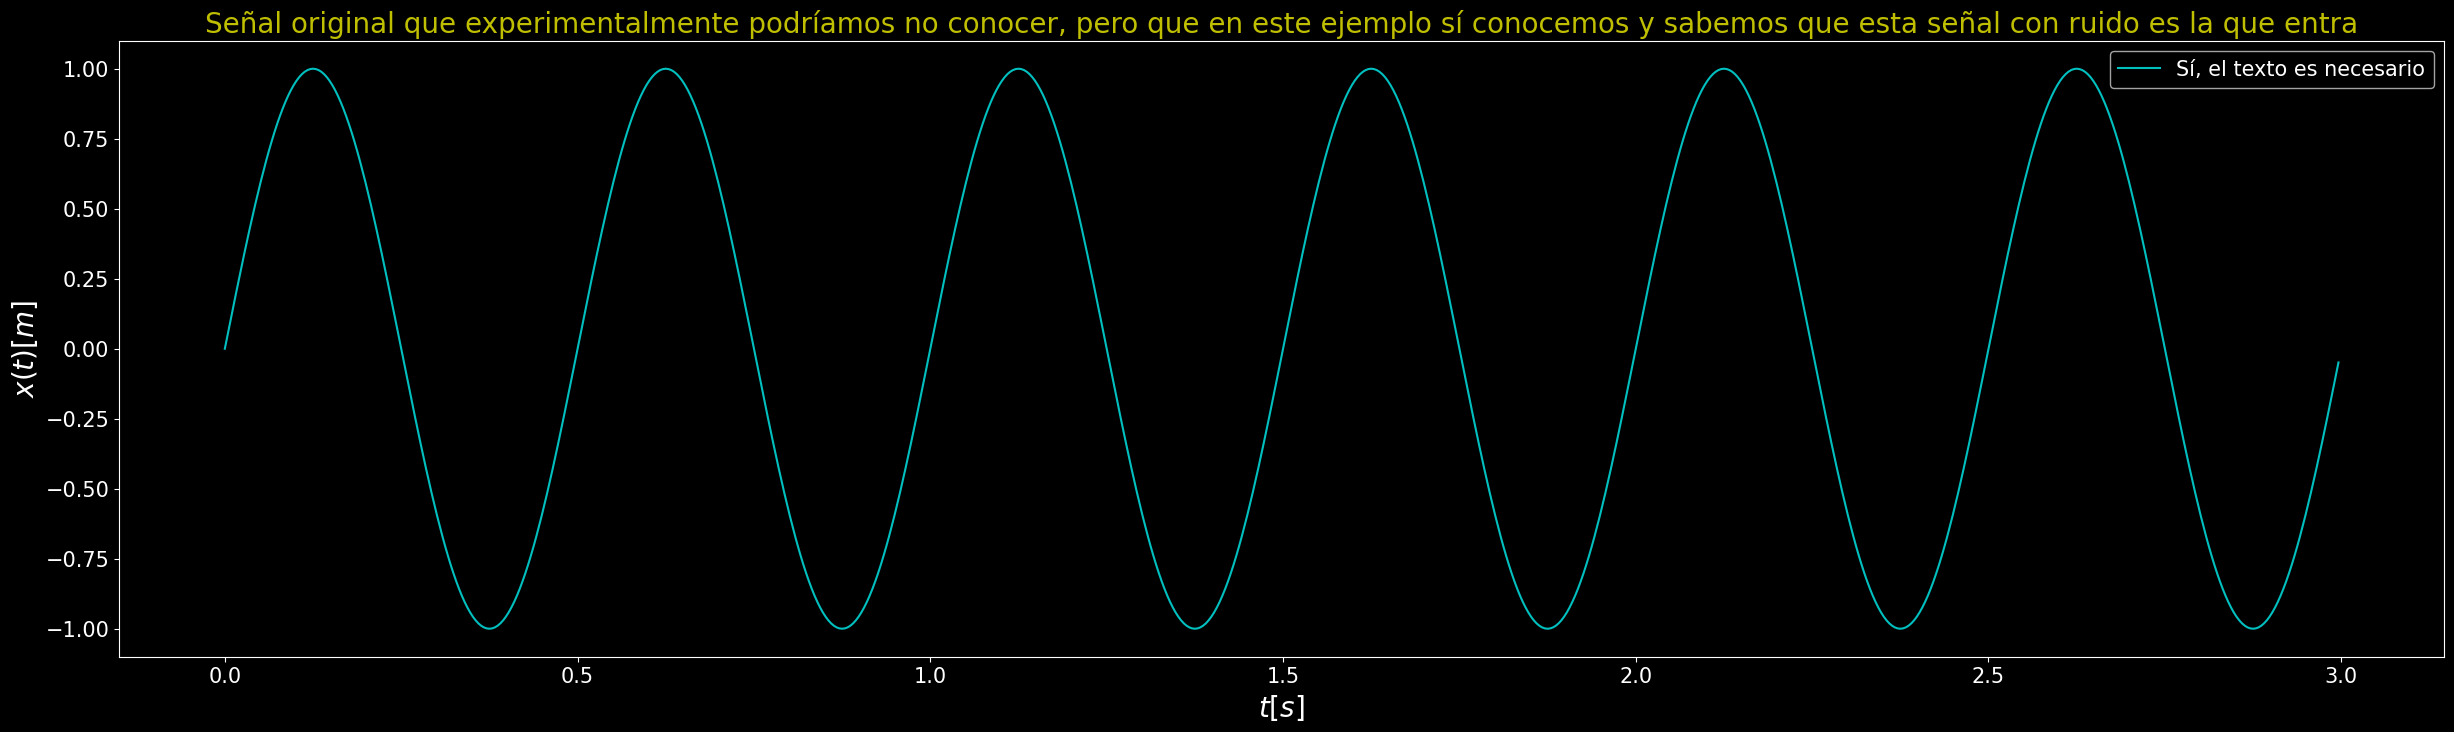

In [65]:
t1=np.arange(0,3,1/256)
x1=np.sin(2*np.pi*2*t1)
plt.figure(figsize = (30,8))
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.title('Señal original que experimentalmente podríamos no conocer, pero que en este ejemplo sí conocemos y sabemos que esta señal con ruido es la que entra', fontsize = 20, color="y")
plt.plot(t1,x1,'c',label = 'Sí, el texto es necesario')
plt.legend(fontsize = 15)
plt.xlabel('$t [s]$', fontsize = 20)
plt.ylabel('$x(t)[m]$', fontsize = 20)
plt.show()

In [40]:
# Generando el ruido y preparando el terreno para la discretización:
Fs=256 #Hz, la frecuencia de muestreo
t=np.arange(0,3, 1/Fs) #Tau [s] = 1/Fs es el periodo de muestreo
x=np.sin(2*np.pi*2*t) #Señal original 
noise=5 * np.random.randn(len(t))
x_ruido=x+noise #La señal con ruido generada va a ser una superposición del ruido y la señal original
len(x_ruido)==len(t)

True

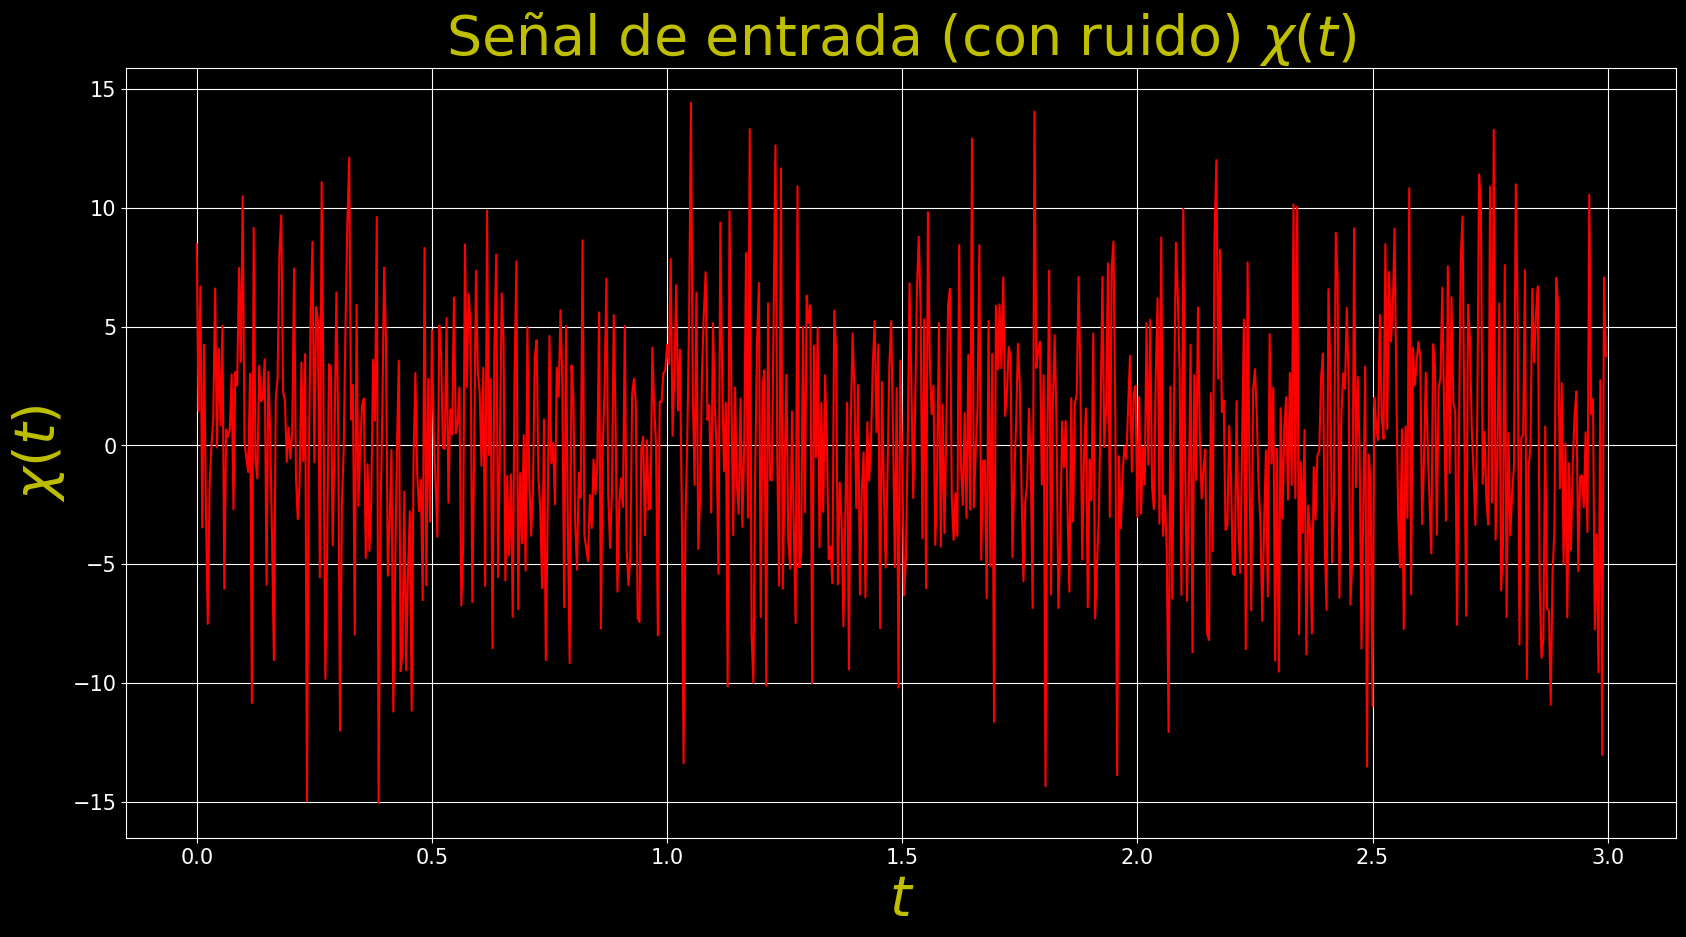

In [82]:
plt.figure(figsize = (20,10))
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(t,x_ruido,'r')
plt.title(r'Señal de entrada (con ruido) $\chi(t)$', color="y", fontsize = 40)
plt.xlabel('$t$', color="y", fontsize = 40)
plt.ylabel('$\chi(t)$', color="y", fontsize = 40)
plt.grid(True)
plt.show()

In [67]:
#Vamos a definir la ventana de la señal de entrada M=30
M=30
#Convolución asociada al average moving filter:
y=np.convolve(x_ruido, np.ones(M)/M, mode='valid') #convolución de la señal con ruido con la respuesta al impulso h(n)=1/M
t_filtrado = t[M-1:] 

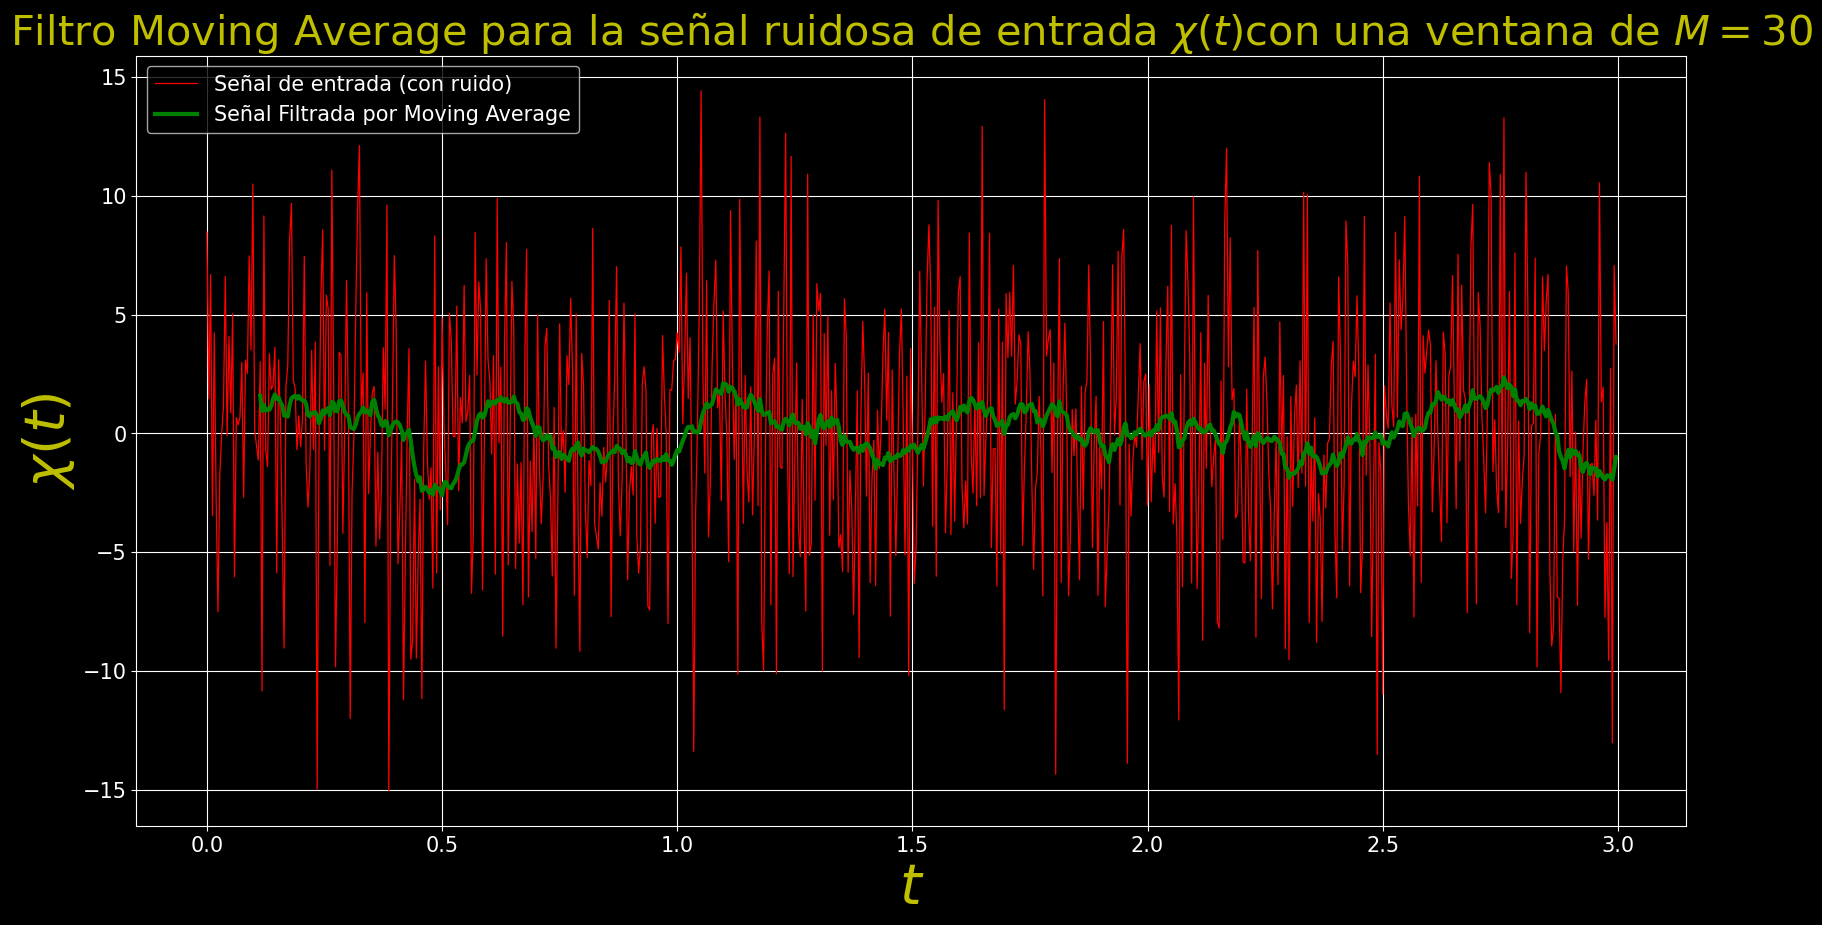

In [86]:
plt.figure(figsize = (20,10))
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(t,x_ruido,'r', linewidth=0.9, label='Señal de entrada (con ruido)')
plt.plot(t_filtrado, y, label='Señal Filtrada por Moving Average', color='g', linewidth=3)
plt.title(r'Filtro Moving Average para la señal ruidosa de entrada $\chi(t)$con una ventana de $M=30$', color="y", fontsize = 30)
plt.xlabel('$t$', color="y", fontsize = 40)
plt.ylabel('$\chi(t)$', color="y", fontsize = 40)
plt.legend(fontsize = 15)
plt.grid(True)
plt.show()

# Fin del ejercicio.

# Bibliografía recomendada:

### 1) Osgood, B. G. (2019). Lectures on the Fourier transform and its applications. Princeton University Press.

### 2) Damelin, S. B., & Miller, W. (2006). The mathematics of signal processing. Academic Press.

### 3) Proakis, J. G., & Manolakis, D. K. (2007). Digital signal processing: Principles, algorithms, and applications (4th ed.). Pearson.